## Install and Import Dependencies

Instructions YT Tutorial
https://www.youtube.com/watch?v=A9_0OgW1LZU

use pip install if you don't have watson libraries installed

In [9]:
import os
#!pip install ibm_watson
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import matplotlib.pyplot as plt
import json
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson import SpeechToTextV1
from ibm_watson.speech_to_text_v1 import CustomWord
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.speech_to_text_v1 import CustomWord
from ibm_watson import LanguageTranslatorV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

from dotenv import dotenv_values

#link to IBM STT documentation:
#https://cloud.ibm.com/apidocs/speech-to-text?code=python#createlanguagemodel

## Setup STT Service

Will be using the python-dotenv library to store API keys so that they are not publicly available on GitHub. I have confiured a .env file as described on the following link: https://github.com/theskumar/python-dotenv

In [29]:
config = dotenv_values(".env")

apikey = config["stt_apikey"]
url = config["stt_url"]

In [18]:
# Setup Service
authenticator = IAMAuthenticator(apikey)
stt = SpeechToTextV1(authenticator=authenticator)
stt.set_service_url(url)

## Open Audio Source and Convert 

In [21]:
# Perform conversion

#Audio file taken from following link:
#https://www.youtube.com/watch?v=pOZkbANHlTI

model_name = 'en-US_NarrowbandModel'

audio_file_path = "/Users/nikhilgopal/IBM Trainings/Watson STT Training/news_file.mp3"

with open(audio_file_path, 'rb') as f:
    res = stt.recognize(audio=f, content_type='audio/mp3', model=model_name).get_result()

In [7]:
#res

In [22]:
text = res['results'][0]['alternatives'][0]['transcript']
text

"the world come doing a record number of viewers and try and for Argentina's Lin L. Massey here's a look by the numbers fifteen point four million U. S. households watched yesterday's World Cup final and all time U. S. audience record and again certainly delivered on the drama for just the third time in history the World Cup title was decided by a penalty shoot out thirty six years old that's a long Argentina had waited for a World Cup win thirty five year old Lino Massey had not even been born yet the last time is country once he scored two goals and the first of five should all penalties to win his team along company championship meeting crowns on a legendary career with seven hundred ninety three eagles forty two club an international titles and a record seven alone is doing %HESITATION mole ready to his name the World Cup win makes messy the most decorated soccer player in history along with Brazilian player Danielle she's behind only Cristiano Ronaldo in all time goals but he is t

In [23]:
confidence_levels = {}
confidence = res['results'][0]['alternatives'][0]['confidence']
confidence_levels[model_name] = confidence

## Save Output as Text File

In [24]:
with open('output.txt', 'w') as out:
    out.writelines(text)
f.close()

## Change Language Models

Link to model catalog:

https://cloud.ibm.com/apidocs/speech-to-text?code=python#listmodels
https://ibmdocs-test.mybluemix.net/docs/en/watson-libraries?topic=home-models-catalog

In [25]:
# Perform conversion
model_name2 = 'en-US_Multimedia'

with open(audio_file_path, 'rb') as f:
    res2 = stt.recognize(audio=f, content_type='audio/mp3', model=model_name2).get_result()

In [26]:
#res
text2 = res2['results'][0]['alternatives'][0]['transcript']
text2

"the world come during a record number of viewers and triumph for argentina's leonel messy here's a look by the numbers fifteen point four million u s households watch yesterday's world cup final and all time u s audience record and the game certainly delivered on the drama for just the third time in history the world cup title was decided by a penalty shoot out thirty six years folks that's how long argentina had waited for a world cup when thirty five year old leonel messy had not even been born yet the last time his country won he scored two goals and the first of five shoot out penalties to win his team the long covered championship a fitting crown on a legendary career with seven hundred ninety three goals forty two club and international titles and a record seven balance day auto already to his name the world cup win makes messy the most decorated soccer player in history along with brazilian player danny alves he's behind only christian renaulto in all time goals but he has thre

In [27]:
confidence2 = res['results'][0]['alternatives'][0]['confidence']
confidence2
confidence_levels[model_name2] = confidence2

It appears that the multimedia model has a higher confidence than the standard narrowband model:

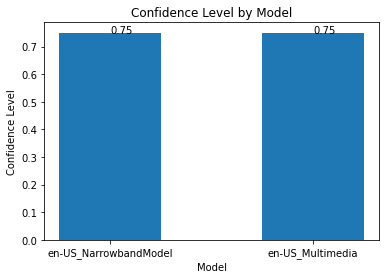

In [28]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = list(confidence_levels.keys())
    y = list(confidence_levels.values())

    # making the bar chart on the data
    plt.bar(x, y, width= 0.5, align="center")

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title("Confidence Level by Model")

    # giving X and Y labels
    plt.xlabel("Model")
    plt.ylabel("Confidence Level")

    # visualizing the plot
    plt.show()

## Create A Custom Language Model

Import libraries:

In [30]:
authenticator = IAMAuthenticator(apikey)
speech_to_text = SpeechToTextV1(
    authenticator=authenticator
)

speech_to_text.set_service_url(url)

Create Model:

In [31]:
language_model = speech_to_text.create_language_model(
    'add_words',
    'en-US_BroadbandModel',
    description='Trying out adding words'
).get_result()

print(json.dumps(language_model, indent=2))

{
  "customization_id": "2b2fe6ab-b9c3-4c78-b41f-11b7e104ce1c"
}


Display all custom language models:

In [32]:
%%capture

#using capture to prevent display of output as list is too long, will paste the first two in markdown box below for demonstration purposes

language_models = speech_to_text.list_language_models().get_result()
print(json.dumps(language_models, indent=2))

{
  "customizations": [
    {
      "owner": "bfa0c14c-97ab-489d-93f6-4d45b9396076",
      "base_model_name": "en-US_BroadbandModel",
      "customization_id": "edf3b09e-3ccf-45ba-8459-f9d3654b1ffe",
      "dialect": "en-US",
      "versions": [
        "en-US_BroadbandModel.v2020-01-16"
      ],
      "created": "2023-01-10T02:49:20.563Z",
      "name": "add_words",
      "description": "Trying out adding words",
      "progress": 0,
      "language": "en-US",
      "updated": "2023-01-10T02:49:20.563Z",
      "status": "pending"
    },

Get attributes of a specific model by custom ID:

In [33]:
model_id = "c72e276f-9262-4362-855a-89b8f21cda47"

language_model = speech_to_text.get_language_model(model_id).get_result()
print(json.dumps(language_model, indent=2))

{
  "owner": "bfa0c14c-97ab-489d-93f6-4d45b9396076",
  "base_model_name": "en-US_BroadbandModel",
  "customization_id": "c72e276f-9262-4362-855a-89b8f21cda47",
  "dialect": "en-US",
  "versions": [
    "en-US_BroadbandModel.v2020-01-16"
  ],
  "created": "2022-12-28T16:39:53.952Z",
  "name": "add_words",
  "description": "Trying out addinIntellijIdeaRulezzz ",
  "progress": 0,
  "language": "en-US",
  "updated": "2023-01-10T03:04:34.285Z",
  "status": "ready"
}


## Train Language Model:

Add Custom Words:

Start with checking which custom words are already in the model, then add some more:

In [34]:
words = speech_to_text.list_words(model_id).get_result()
print(json.dumps(words, indent=2))

authenticator = IAMAuthenticator(apikey)
speech_to_text = SpeechToTextV1(
    authenticator=authenticator
)

speech_to_text.set_service_url(url)

messi_word_obj = CustomWord(
    word='Messi',
    sounds_like=['messy', 'Messy', 'massey'],
    display_as='Messi'
)

lionel_word_obj = CustomWord(
    word='Lionel',
    sounds_like=['leonel']
)

trying_word_obj = CustomWord(
    word='trying',
    sounds_like=['tryin']
)

speech_to_text.add_words(
    model_id,
    [messi_word_obj, lionel_word_obj, trying_word_obj]
)
# Poll for language model status.
words = speech_to_text.list_words(model_id).get_result()
print(json.dumps(words, indent=2))

{
  "words": [
    {
      "display_as": "Lionel",
      "sounds_like": [
        "leonel"
      ],
      "count": 1,
      "source": [
        "user"
      ],
      "word": "Lionel"
    },
    {
      "display_as": "Messi",
      "sounds_like": [
        "Messy",
        "massey",
        "messy"
      ],
      "count": 1,
      "source": [
        "user"
      ],
      "word": "Messi"
    },
    {
      "display_as": "Montiel's",
      "sounds_like": [
        "Montiel's"
      ],
      "count": 1,
      "source": [
        "corpus1"
      ],
      "word": "Montiel's"
    },
    {
      "display_as": "handywoman",
      "sounds_like": [
        "handywoman"
      ],
      "count": 1,
      "source": [
        "corpus1"
      ],
      "word": "handywoman"
    },
    {
      "display_as": "trying",
      "sounds_like": [
        "tryin"
      ],
      "count": 1,
      "source": [
        "user"
      ],
      "word": "trying"
    }
  ]
}
{
  "words": [
    {
      "sounds_like": [
   

Run training:

In [ ]:
speech_to_text.train_language_model(model_id, word_type_to_add="all", strict=False)

## Run and Test Trained Model

In [41]:
with open(audio_file_path, 'rb') as f:
    res_word_added = stt.recognize(audio=f, content_type='audio/mp3', language_customization_id=model_id).get_result()

Save output of new trained model and compare confidence levels with old models:

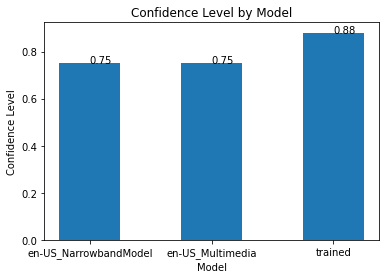

In [42]:
text_trained = res_word_added['results'][0]['alternatives'][0]['transcript']

with open('output2.txt', 'w') as out:
    out.writelines(text_trained)
f.close()
out.close()

confidence_trained = res_word_added['results'][0]['alternatives'][0]['confidence']

confidence_levels["trained"] = confidence_trained

if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = list(confidence_levels.keys())
    y = list(confidence_levels.values())

    # making the bar chart on the data
    plt.bar(x, y, width= 0.5, align="center")

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title("Confidence Level by Model")

    # giving X and Y labels
    plt.xlabel("Model")
    plt.ylabel("Confidence Level")

    # visualizing the plot
    plt.show()

Test effects of Custom Words

In [44]:
new_file_path = "/Users/nikhilgopal/IBM Trainings/Watson STT Training/messy-messi.mp3"

with open(new_file_path, 'rb') as f:
    res_word_added = stt.recognize(audio=f, content_type='audio/mp3', language_customization_id=model_id).get_result()

In [45]:
text_test = res_word_added['results'][0]['alternatives'][0]['transcript']

print(text_test)

the room is very Messi the room is extremely Messi Lionel Messi is the best football player in the world 


The model transcribes every word as Messi. Lets see if adding a Corpus can help the model distinguish between sports related and non-sports related and non sports related situations.

## Add Corpus

Check if there are any corpora already:

In [46]:
corpora = speech_to_text.list_corpora(model_id).get_result()
print(json.dumps(corpora, indent=2))

{
  "corpora": [
    {
      "out_of_vocabulary_words": 2,
      "total_words": 528,
      "name": "corpus1",
      "status": "analyzed"
    }
  ]
}


In [ ]:
#pass path to corpus file

with open("/Users/nikhilgopal/IBM Trainings/Watson STT Training/samplecorpus.txt",
          'rb') as corpus_file:
    speech_to_text.add_corpus(
        model_id,
        'corpus1',
        corpus_file
    )

# Poll for corpus status.

In [60]:
#check if corpus added successfully

corpora = speech_to_text.list_corpora(model_id).get_result()
print(json.dumps(corpora, indent=2))

{
  "corpora": [
    {
      "out_of_vocabulary_words": 2,
      "total_words": 528,
      "name": "corpus1",
      "status": "analyzed"
    }
  ]
}


Check performance of model after adding Corpus:

In [61]:
with open(new_file_path, 'rb') as f:
    res_word_added = stt.recognize(audio=f, content_type='audio/mp3', language_customization_id=model_id).get_result()

text_test2 = res_word_added['results'][0]['alternatives'][0]['transcript']

print(text_test2)

the room is very Messi the room is extremely Messi Lionel Messi is the best football player in the world 


## Watson Translation

List supported languages

In [62]:
translate_api_key = config["translate_api_key"]
translate_url = config["translate_url"]

authenticator = IAMAuthenticator(translate_api_key)
language_translator = LanguageTranslatorV3(
    version='2018-05-01',
    authenticator=authenticator
)

language_translator.set_service_url(translate_url)

languages = language_translator.list_languages().get_result()
#print(json.dumps(languages, indent=2))

## Identify Text Language

In [64]:
language = language_translator.identify(
    text_trained).get_result()
print(json.dumps(language, indent=2))

{
  "languages": [
    {
      "language": "en",
      "confidence": 0.999999999983779
    },
    {
      "language": "nn",
      "confidence": 5.205084059226688e-12
    },
    {
      "language": "tr",
      "confidence": 2.0377123947884035e-12
    },
    {
      "language": "tl",
      "confidence": 1.995105145518952e-12
    },
    {
      "language": "nl",
      "confidence": 1.4529303286820957e-12
    },
    {
      "language": "vi",
      "confidence": 1.4519940530481691e-12
    },
    {
      "language": "de",
      "confidence": 1.2823257547489229e-12
    },
    {
      "language": "da",
      "confidence": 8.721800702126013e-13
    },
    {
      "language": "af",
      "confidence": 7.587439877135221e-13
    },
    {
      "language": "ku",
      "confidence": 2.2913998442867956e-13
    },
    {
      "language": "nb",
      "confidence": 2.0782208303034792e-13
    },
    {
      "language": "es",
      "confidence": 1.821021283721029e-13
    },
    {
      "language": "ms",
 

## Translate the text

In [65]:
translation = language_translator.translate(
    text=text_trained,
    model_id='en-es').get_result()

print(json.dumps(translation, indent=2, ensure_ascii=False))

{
  "translations": [
    {
      "translation": "el mundo vienen a unirse a un número récord de espectadores y tratando de que el argentino Lionel Messi aquí es una mirada por los números quince puntos cuatro millones de U. S. hogares ver la final de la Copa del Mundo de ayer y todo el tiempo U. S. récord de audiencia y juego sin duda entregado en el drama por sólo la tercera vez en la historia el título de la Copa del Mundo fue decidido por un tiro penal de treinta y seis años amigos que 'es cuánto tiempo Argentina había esperado a una Copa del Mundo ganar treinta y cinco años Lionel Messi ni siquiera había nacido todavía la última vez que su país marcó dos goles y el primero de cinco tiros fuera de penales para ganar a su equipo el largo ansiado campeonato de tiro corona en una carrera legendaria con setecientos noventa y tres goles cuarenta dos clubes un internacional y un récord de siete Malone ya está ahí a su nombre la Copa del Mundo gana hace a Messi el jugador de fútbol más co

Save a text file of the translation:

In [125]:
text_translated = translation['translations'][0]['translation']

with open("output_translated.txt", 'w') as f:
    f.writelines(text_translated)
f.close()